In [220]:
%matplotlib inline
from rtree import index
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import cm
from ipywidgets import FloatProgress
import simplejson as json
from scipy import optimize
plt.style.use('dark_background')

This is an old notebook on measuring the fractal dimension of the laplacian random walk, which I then realised whas equivalent to a LERW, making it slightly useless...

In [4]:
def random_unit_vector():
    theta = 2*np.pi*np.random.uniform()
    return np.array([np.sin(theta),np.cos(theta)])

The following code adds a ball near the ball b0, and returns either an angle if we managed to do a rw from there to infinity or None otherwise. 

In [27]:
def random_walk_to_infinity(x0, idx, positions, ball_radius = 1, max_dist=1E3, d0 = 5):
    epsilon = 0.05
    angle0 = random_unit_vector()
    
    pos = np.array(x0)+(2+d0)*ball_radius*angle0 #start at a random place at distance 2+d0
    pos0 = np.array(x0)+2*ball_radius*angle0 # the ball will attach at angle d
    
    distance = 2*ball_radius #just initialize the distance to the nearest neigh to a lower bound
    
    while distance < max_dist:
        #update position with allowed jump
        pos += random_unit_vector()*(distance-(2-epsilon)*ball_radius) #move too much knowing that you might hit
        # decide how much we should jump next time
        closest_object_id = idx.nearest(tuple(pos)*2, 1).next() # this be the closest object id
        closest_object = positions[closest_object_id] #check the closest object position
        distance = np.sum((pos-closest_object)**2)**.5 #compute the distance to it
        if distance < 2: 
            return None;

    return pos0

In [304]:
def Endpoint_DLA(n_balls = 100, old_balls=[(0,0)],**kwargs):
    idx = index.Index()
    
    for ind,ball in enumerate(old_balls): #add all the old balls to the tree
        idx.insert(ind, tuple(ball)*2)
        
    positions = list(old_balls) #copy old_balls to return a fresh array
    max_dist = 2*np.max(np.abs(positions))+4 #just to be sure.. doesn't hurt much
    
    f = FloatProgress(min=len(old_balls), max=n_balls+len(old_balls)) #create progress bar
    display(f);
    f.value = 10
    for i in range(len(old_balls),n_balls+len(old_balls)): #to keep the index nice
        f.value = i
        if i%100 ==0:
            print i,
        new_pos = None
        while new_pos is None:
            new_pos = random_walk_to_infinity(positions[-1],idx, positions,**kwargs)
        idx.insert(i, tuple(new_pos)*2)
        positions.append(new_pos)
        
    f.value = n_balls+len(old_balls) #finish up the progress bar
    f.bar_style = 'success'
    
    return positions

In [191]:
distances = (25,10,5,2,1)
z_list = [[(0,0)] for x in distances]

In [192]:
for i,d0 in enumerate(distances):
    z = Endpoint_DLA(2500,d0 = 20,old_balls=z_list[i])
    z_list[i]=z

FloatProgress(value=1.0, max=2501.0, min=1.0)

25 50 75 100 125 150 175 200 225 250 275 300 325 350 375 400 425 450 475 500 525 550 575 600 625 650 675 700 725 750 775 800 825 850 875 900 925 950 975 1000 1025 1050 1075 1100 1125 1150 1175 1200 1225 1250 1275 1300 1325 1350 1375 1400 1425 1450 1475 1500 1525 1550 1575 1600 1625 1650 1675 1700 1725 1750 1775 1800 1825 1850 1875 1900 1925 1950 1975 2000 2025 2050 2075 2100 2125 2150 2175 2200 2225 2250 2275 2300 2325 2350 2375 2400 2425 2450 2475 2500

FloatProgress(value=1.0, max=2501.0, min=1.0)

 25 50 75 100 125 150 175 200 225 250 275 300 325 350 375 400 425 450 475 500 525 550 575 600 625 650 675 700 725 750 775 800 825 850 875 900 925 950 975 1000 1025 1050 1075 1100 1125 1150 1175 1200 1225 1250 1275 1300 1325 1350 1375 1400 1425 1450 1475 1500 1525 1550 1575 1600 1625 1650 1675 1700 1725 1750 1775 1800 1825 1850 1875 1900 1925 1950 1975 2000 2025 2050 2075 2100 2125 2150 2175 2200 2225 2250 2275 2300 2325 2350 2375 2400 2425 2450 2475 2500

FloatProgress(value=1.0, max=2501.0, min=1.0)

 25 50 75 100 125 150 175 200 225 250 275 300 325 350 375 400 425 450 475 500 525 550 575 600 625 650 675 700 725 750 775 800 825 850 875 900 925 950 975 1000 1025 1050 1075 1100 1125 1150 1175 1200 1225 1250 1275 1300 1325 1350 1375 1400 1425 1450 1475 1500 1525 1550 1575 1600 1625 1650 1675 1700 1725 1750 1775 1800 1825 1850 1875 1900 1925 1950 1975 2000 2025 2050 2075 2100 2125 2150 2175 2200 2225 2250 2275 2300 2325 2350 2375 2400 2425 2450 2475 2500

FloatProgress(value=1.0, max=2501.0, min=1.0)

 25 50 75 100 125 150 175 200 225 250 275 300

KeyboardInterrupt: 

In [51]:
x,y = np.array(z).T

In [52]:
raimbow = cm.get_cmap('rainbow')

1501 1501 1501 1501 1501 1500 1500 1500 1500 1500 1501 1501 1501 1501 1501


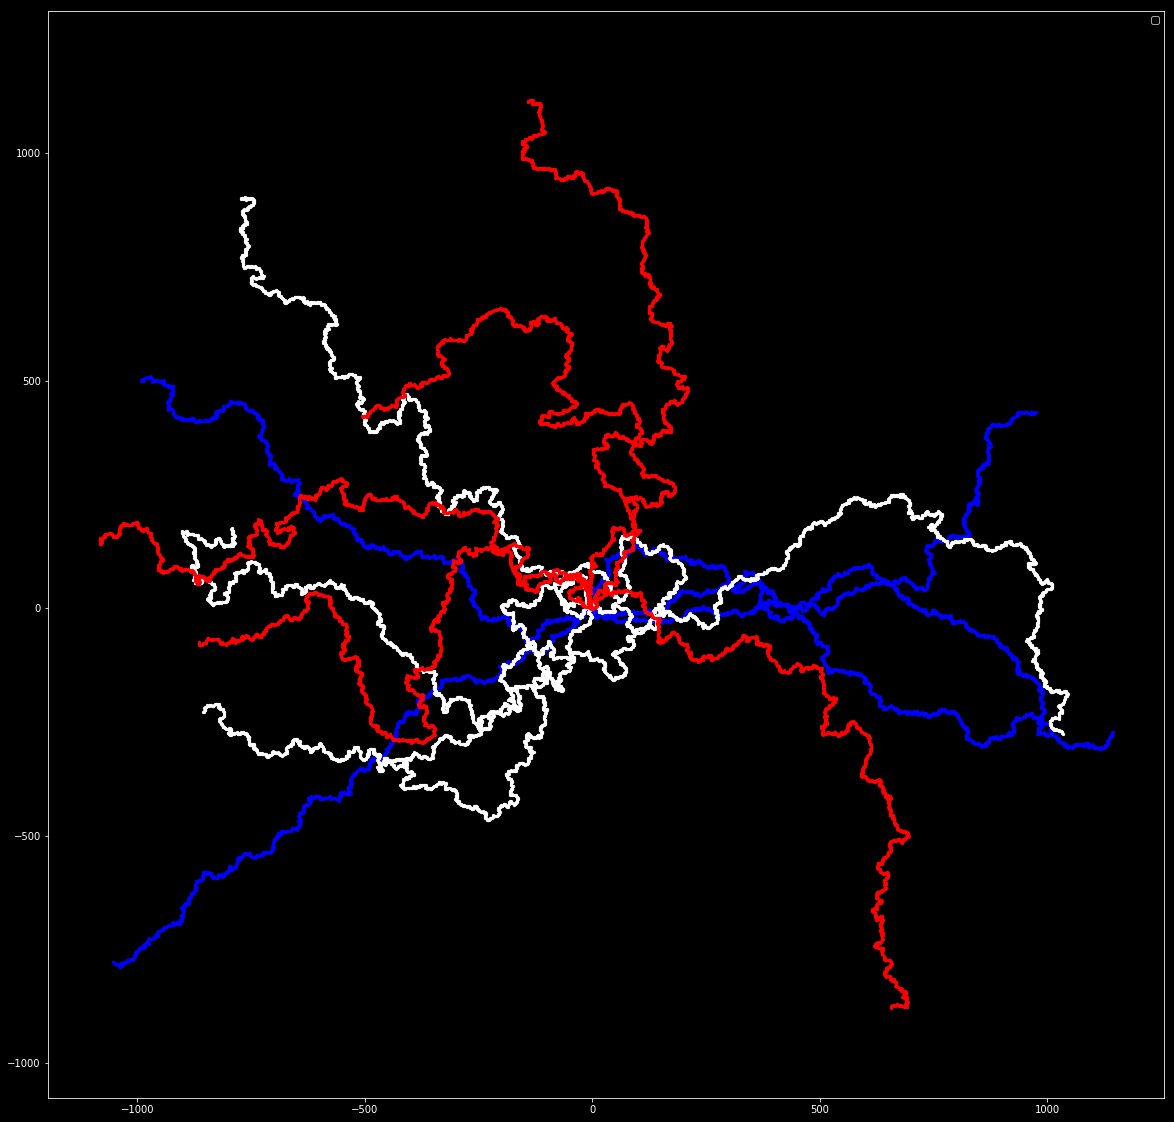

In [185]:
plt.figure(figsize=(20,20))
for z ,d in zip(z_list,distances):
    x,y = np.array(z).T
    print len(x),
    c = np.linspace(0,1,len(x) )
    plt.scatter(x,y,s=5, c='b')
    
for z ,d in zip(z_vals_1,distances):
    x,y = np.array(z).T
    print len(x),
    c = np.linspace(0,1,len(x) )
    plt.scatter(x,y,s=5, c='w')
    
for z ,d in zip(z_vals_2,distances):
    x,y = np.array(z).T
    print len(x),
    c = np.linspace(0,1,len(x) )
    plt.scatter(x,y,s=5, c='r')
plt.legend()
plt.axes().set_aspect('equal', 'datalim')


In [361]:
def length_at_scales(x,y):
    result = []
    for k in range(1,len(x)/20+1):
        l = (len(x)/k)*k
        xk = np.reshape(x[:l],(k,len(x)/k), order = 'F') # we have k arrays of k-spaced
        yk = np.reshape(y[:l],(k,len(y)/k), order = 'F') # elements of the curve
        dxk ,dyk = np.diff(xk,axis=1), np.diff(yk,axis=1)
        d = (dxk**2+dyk**2)**.5
        l = (np.mean(d)*len(x))/k #factor to offset what we cut before to reshape 
        result.append(l)
    return result

IndexError: index 0 is out of bounds for axis 0 with size 0

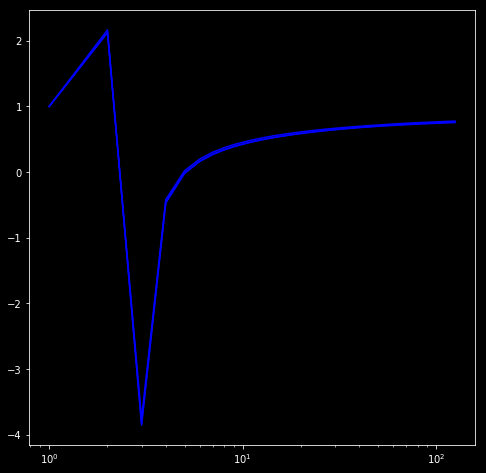

In [362]:
plt.figure(figsize = (8,8))

for z,d in zip(z_list,distances):
    x,y = np.array(z).T
    length = np.array(length_at_scales(x,y))
    length/=length[0]
    scale = np.arange(len(length))+1
    quot = (np.log(length)-1)/(np.log(scale)-1)
    plt.semilogx(scale,quot,c='b')
    
for z,d in zip(z_vals_2,distances):
    x,y = np.array(z).T
    length = np.array(length_at_scales(x,y))
    length/=length[0]
    scale = np.arange(len(length))+1
    quot = (np.log(length)-1)/(np.log(scale)-1)
    plt.semilogx(scale,quot,c='w')

for z,d in zip(z_vals_1,distances):
    x,y = np.array(z).T
    length = np.array(length_at_scales(x,y))
    length/=length[0]
    scale = np.arange(len(length))+1
    quot = (np.log(length)-1)/(np.log(scale)-1)
    plt.semilogx(scale,quot,c='r')

plt.ylim(-4,0)
plt.xlim(4,80)

In [305]:
z = Endpoint_DLA(30000,d0 = 20,old_balls=z)

FloatProgress(value=20001.0, max=50001.0, min=20001.0)

20100 20200 20300 20400 20500 20600 20700 20800 20900 21000 21100 21200 21300 21400 21500 21600 21700 21800 21900 22000 22100 22200 22300 22400 22500 22600 22700 22800 22900 23000 23100 23200 23300 23400 23500 23600 23700 23800 23900 24000 24100 24200 24300 24400 24500 24600 24700 24800 24900 25000 25100 25200 25300 25400 25500 25600 25700 25800 25900 26000 26100 26200 26300 26400 26500 26600 26700 26800 26900 27000 27100 27200 27300 27400 27500 27600 27700 27800 27900 28000 28100 28200 28300 28400 28500 28600 28700 28800 28900 29000 29100 29200 29300 29400 29500 29600 29700 29800 29900 30000 30100 30200 30300 30400 30500 30600 30700 30800 30900 31000 31100 31200 31300 31400 31500 31600 31700 31800 31900 32000 32100 32200 32300 32400 32500 32600 32700 32800 32900 33000 33100 33200 33300 33400 33500 33600 33700 33800 33900 34000 34100 34200 34300 34400 34500 34600 34700 34800 34900 35000 35100 35200 35300 35400 35500 35600 35700 35800 35900 36000 36100 36200 36300 36400 36500 36600 3670

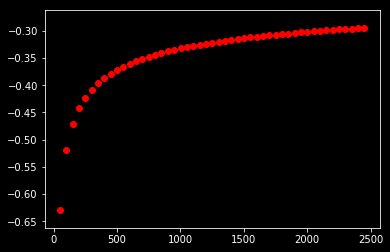

In [326]:
x,y = np.array(z).T
length = np.array(length_at_scales(x,y))
length/=length[0]
scale = np.arange(len(length))+1
quot = (np.log(length)-1)/(np.log(scale)-1)
plt.scatter(scale[50::50],quot[50::50],c='r')

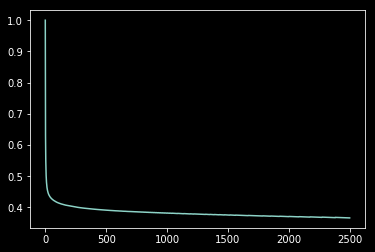

In [360]:
plt.plot(length)

In [356]:
fit_func = lambda x,a,b,c : a*x**b+c

results = []
fracs = (.9,.8,.7,.6)
for frac in fracs:
    print frac
    fit_x =[]
    fit_y = []
    for max_v in range(int(50/(1-frac)),len(scale),2):
        min_v = int((1-frac)*max_v)
        val,cov =optimize.curve_fit(fit_func, scale[min_v:max_v], quot[min_v:max_v],p0 = (-2,-.4,-.2))
        fit_x.append(max_v)
        fit_y.append(val[2])
    results.append((fit_x,fit_y))

0.9
0.8
0.7
0.6


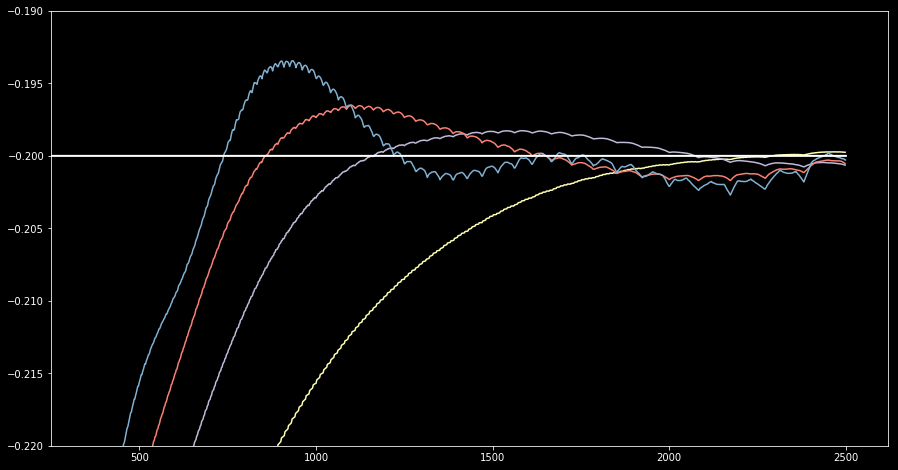

In [357]:
plt.figure(figsize=(15,8))
n = 100
plt.plot(scale[n:],quot[n:])
for x_p,y_p in results:
    plt.plot(x_p,y_p)
plt.ylim(-.22,-.19)
plt.xlim(250,)
plt.plot(scale[n:],scale[n:]*0-.2,'w',lw=2)

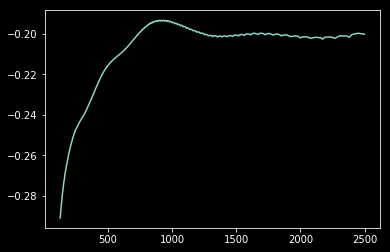

In [367]:
plt.plot(x_p,y_p)